# Simple regression model selection


In [1]:
import jax
import jax.numpy as jnp
from pcv.inference import run_cv_sel
from pcv.plots import plot_model_results, plot_fold_results
from pcv.models import reg
from pcv.rules import make_positive_rule, make_positive_negative_rule
import matplotlib.pyplot as plt

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


## Model definition

Gaussian linear regression, with an outlier injected into the data

In [2]:
y, X = reg.generate(
    key=jax.random.PRNGKey(0),
    N = 100,
    beta0 = jnp.array([1.0, 1.0, 1.0, 0.5]),
    sigsq0 = jnp.array(2.0))
y = y.at[23].set(25.0)

plt.plot(y)
plt.title('Simulated data')
plt.tight_layout()

In [5]:
logjoint_density, log_pred, make_initial_pos = reg.get_model(y, X, K=5)

## Inference


In [7]:
inference_key = jax.random.PRNGKey(43)
stoprule = make_positive_negative_rule(num_folds=5, level=0.95)
results = run_cv_sel(
       prng_key=inference_key,
       logjoint_density=logjoint_density,
       log_p=log_pred,
       make_initial_pos=make_initial_pos,
       stoprule=stoprule,
       num_folds=5,
       num_chains=4,
       batch_size=100,
       warmup_iter=1000,
       max_batches=50,
       ignore_stoprule=True
)

MEADS warmup for 5 folds per model (40 chains)...
Completed 40000 warmup iterations in 6 seconds
Starting cross-validation with 40 parallel GHMC chains...
Drew 200000 iterations in 172.0 seconds (1163 i/s)


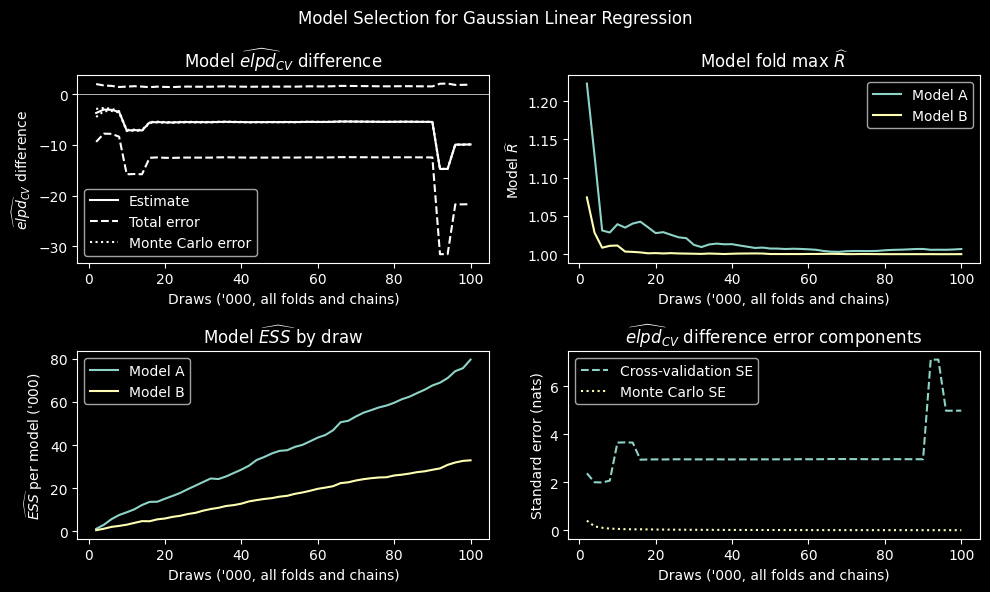

In [12]:
plot_model_results(results, title="Model Selection for Gaussian Linear Regression")

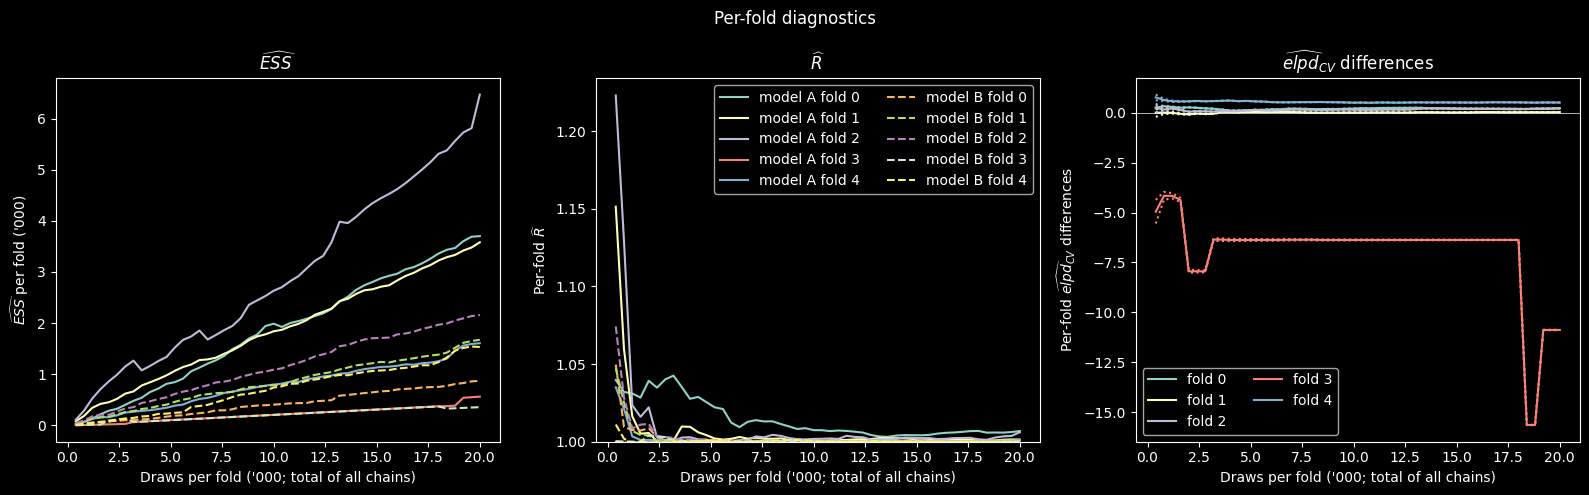

In [13]:
plot_fold_results(results, title='Per-fold diagnostics')